In [36]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

from astropy import visualization

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/raw/sdBShortP_large_BPS_set.csv')
df['CE'] = df['stability'].apply(lambda x: 0 if x=='stable' else 1)

In [3]:
df.head()

,path,stability,n_ML_phases,FeH_init,Z_init,termination_code,PRLODays,PoverPMax,TtipMyr,GalAgeMyr,AgeBinNum,DeltaTBin,P_init,P_final,M1_init,M1_final,M2_init,M2_final,q_init,q_final,M1_HeIgnition,M1core_HeIgnition,M1env_HeIgnition,age_HeIgnition,duration_HeCoreBurning,logg_HeCoreBurning,teff_HeCoreBurning,rad_HeCoreBurning,M1_HeCoreBurning,M1core_HeCoreBurning,M1env_HeCoreBurning,logg2_HeCoreBurning,teff2_HeCoreBurning,rad2_HeCoreBurning,duration_HeShellBurning,M1_HeShellBurning,M1core_HeShellBurning,M1env_HeShellBurning,M1_MLend,M1core_MLend,M1env_MLend,MS_P,MS_q,MS_M1,MS_M2,MS_age,MS_duration,RGB_P,RGB_q,RGB_M1,RGB_M2,RGB_age,RGB_duration,ML_P,ML_q,ML_M1,ML_M2,ML_Mdot_max,ML_age,ML_duration,CE_P_start,CE_q_start,CE_M1_start,CE_M2_start,CE_P_end,CE_q_end,CE_M1_end,CE_M2_end,CE_age,HeCoreBurning_P,HeCoreBurning_q,HeCoreBurning_M1,HeCoreBurning_M2,HeCoreBurning_age,HeCoreBurning_duration,HeShellBurning_P,HeShellBurning_q,HeShellBurning_M1,HeShellBurning_M2,HeShellBurning_age,HeShellBurning_duration,He-WD_P,He-WD_q,He-WD_M1,He-WD_M2,He-WD_age,CO-WD_P,CO-WD_q,CO-WD_M1,CO-WD_M2,CO-WD_age,MS,RGB,ML,CE,HeCoreBurning,HeShellBurning,sdA,sdB,sdO,He-WD,CO-WD,stability_criterion,stability_limit,ce_profile_name,ce_formalism,ce_parameters,error_flags
0,M2.276_M1.694_P40.90_Z0.02106_Jz1.000.h5,stable,1,0.171140,0.021059,log_g_upper_limit,40.895847,1,851.572451,703.290200,2,850,40.900004,486.713314,2.276000,0.498415,1.694,1.694000,1.343565,0.294224,2.274469,0.325792,1.948676,7.400415e+08,1.957497e+08,2.898381,4965.127173,8.993326,2.273891,0.373447,1.900444,4.102649,7288.352955,1.915016,7.051830e+07,2.18597,0.456584,1.729387,0.503088,0.492771,0.010318,40.900023,1.343565,2.275999,1.694,2.305089e+06,7.083588e+08,40.929365,1.343120,2.275245,1.694,7.106639e+08,2.795913e+07,36.255618,1.341567,2.272615,1.694000,-3.961224,9.994625e+08,3.784779e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.653599,1.342661,2.274469,1.694000,7.400415e+08,1.957497e+08,52.139631,1.290419,2.18597,1.694,9.334285e+08,7.051830e+07,NaN,NaN,NaN,NaN,NaN,486.713314,0.294224,0.498415,1.694,1.007311e+09,True,True,True,0,True,True,False,False,False,False,True,Mdot,-0.5,profile_1_mdot-0.5,dewi_tauris2000,"{'a_ce': 0.895, 'a_th': 0.895}",[]
1,M0.856_M0.098_P354.12_Z0.00127_Jz1.000.h5,CE,1,-1.047730,0.001272,uk,354.123239,1,10697.901546,10000.000000,8,0,354.120035,0.588679,0.856000,0.458988,0.098,0.100258,8.734693,4.578059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.458988,0.451675,0.007313,354.126550,8.734604,0.855991,0.098,2.972672e+08,1.003852e+10,354.661710,8.727256,0.855271,0.098,1.033579e+10,9.412886e+08,271.384195,8.451451,0.828269,0.098003,-2.964225,1.127694e+10,1.410301e+05,208.923448,8.154597,0.817566,0.100258,0.588679,4.578059,0.458988,0.100258,1.127708e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1,False,False,False,False,False,False,False,Mdot,-3.0,profile_1_mdot-3.0,dewi_tauris2000,"{'a_ce': 0.974, 'a_th': 0.974}",[2]
2,M1.538_M1.496_P204.20_Z0.01002_Jz1.000.h5,stable,1,-0.151481,0.010019,max_model_number,204.199760,1,2299.722010,2012.325627,4,1000,204.200076,1376.157912,1.537999,0.500370,1.496,1.712768,1.028074,0.292141,0.503373,0.467352,0.036020,2.197634e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.503372,0.467346,0.036026,204.200207,1.028074,1.537998,1.496,5.925975e+06,1.767877e+09,204.295282,1.027602,1.537292,1.496,1.773803e+09,4.232824e+08,191.877697,1.020834,1.527171,1.496004,-3.137714,2.194153e+09,3.481471e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1371.743847,0.293894,0.503373,1.712768,2.197634e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,0,False,False,False,False,False,False,False,Mdot,0.0,profile_1_mdot0.0,dewi_tauris2000,"{'a_ce': 0.18, 'a_th': 0.18}","[0, 3]"
3,M1.263_M0.394_P213.94_Z0.01651_Jz1.000.h5,CE,1,0.065559,0.016514,uk,213.935234,1,5275.088845,5022.896685,6,2000,213.940216,0.970036,1.262999,0.386790,0.394,0.

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13175 entries, 0 to 13174
Data columns (total 108 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   path                     object 
 1   stability                object 
 2   n_ML_phases              int64  
 3   FeH_init                 float64
 4   Z_init                   float64
 5   termination_code         object 
 6   PRLODays                 float64
 7   PoverPMax                int64  
 8   TtipMyr                  float64
 9   GalAgeMyr                float64
 10  AgeBinNum                int64  
 11  DeltaTBin                int64  
 12  P_init                   float64
 13  P_final                  float64
 14  M1_init                  float64
 15  M1_final                 float64
 16  M2_init                  float64
 17  M2_final                 float64
 18  q_init                   float64
 19  q_final                  float64
 20  M1_HeIgnition            float64
 21  M1core_HeIg

In [5]:
df['n_ML_phases'].value_counts()

1     10679
2      1120
3       727
4       249
5       158
6        81
0        50
7        38
8        31
9        21
10       14
11        4
12        2
58        1
Name: n_ML_phases, dtype: int64

In [6]:
#ML phases  #systems1 106792 11203 7274 2495 1586 810 507 388 319 2110 1411 412 258 1

(0, 13)

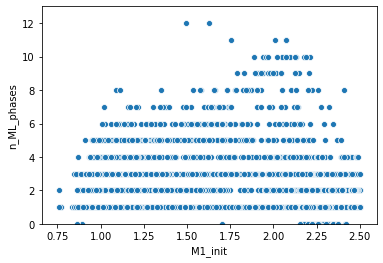

In [7]:
sns.scatterplot('M1_init', 'n_ML_phases', data=df)
pl.ylim([0, 13])

In [8]:
df[df['n_ML_phases'] > 6].sample(5)

,path,stability,n_ML_phases,FeH_init,Z_init,termination_code,PRLODays,PoverPMax,TtipMyr,GalAgeMyr,AgeBinNum,DeltaTBin,P_init,P_final,M1_init,M1_final,M2_init,M2_final,q_init,q_final,M1_HeIgnition,M1core_HeIgnition,M1env_HeIgnition,age_HeIgnition,duration_HeCoreBurning,logg_HeCoreBurning,teff_HeCoreBurning,rad_HeCoreBurning,M1_HeCoreBurning,M1core_HeCoreBurning,M1env_HeCoreBurning,logg2_HeCoreBurning,teff2_HeCoreBurning,rad2_HeCoreBurning,duration_HeShellBurning,M1_HeShellBurning,M1core_HeShellBurning,M1env_HeShellBurning,M1_MLend,M1core_MLend,M1env_MLend,MS_P,MS_q,MS_M1,MS_M2,MS_age,MS_duration,RGB_P,RGB_q,RGB_M1,RGB_M2,RGB_age,RGB_duration,ML_P,ML_q,ML_M1,ML_M2,ML_Mdot_max,ML_age,ML_duration,CE_P_start,CE_q_start,CE_M1_start,CE_M2_start,CE_P_end,CE_q_end,CE_M1_end,CE_M2_end,CE_age,HeCoreBurning_P,HeCoreBurning_q,HeCoreBurning_M1,HeCoreBurning_M2,HeCoreBurning_age,HeCoreBurning_duration,HeShellBurning_P,HeShellBurning_q,HeShellBurning_M1,HeShellBurning_M2,HeShellBurning_age,HeShellBurning_duration,He-WD_P,He-WD_q,He-WD_M1,He-WD_M2,He-WD_age,CO-WD_P,CO-WD_q,CO-WD_M1,CO-WD_M2,CO-WD_age,MS,RGB,ML,CE,HeCoreBurning,HeShellBurning,sdA,sdB,sdO,He-WD,CO-WD,stability_criterion,stability_limit,ce_profile_name,ce_formalism,ce_parameters,error_flags
12565,M1.902_M1.677_P205.64_Z0.00995_Jz1.000.h5,stable,8,-0.154329,0.009953,log_g_upper_limit,205.635794,1,1186.129781,503.649821,2,850,205.640026,1217.672790,1.902000,0.520361,1.677,1.677000,1.134168,0.310293,0.842812,0.452230,0.390581,1.073677e+09,7.629023e+07,2.287919,4506.972600,11.282570,0.841542,0.461700,0.379842,3.998113,7444.335446,2.149012,4.988679e+07,0.835762,0.489211,0.346551,0.842808,0.452235,0.390573,205.640071,1.134168,1.901999,1.677,1.883679e+06,9.507692e+08,205.713199,1.133788,1.901363,1.677,9.526529e+08,1.210212e+08,189.548581,1.128531,1.892547,1.677000,-5.354635,1.071817e+09,1.860262e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707.350719,0.502571,0.842812,1.677000,1.073677e+09,7.629023e+07,719.774443,0.498368,0.835762,1.677000,1.150852e+09,4.988679e+07,NaN,NaN,NaN,NaN,NaN,1217.672790,0.310293,0.520361,1.677000,1.202648e+09,True,True,True,0,True,True,False,False,False,False,True,Mdot,0.0,profile_1_mdot0.0,dewi_tauris2000,"{'a_ce': 0.68, 'a_th': 0.68}",[]
5379,M1.363_M0.938_P784.66_Z0.01355_Jz1.000.h5,stable,7,-0.020365,0.013549,uk,784.658541,1,3786.627499,4044.565949,5,2000,784.660268,1710.426075,1.363000,0.545402,0.938,0.949149,1.453091,0.574622,1.333929,0.465677,0.868252,3.686218e+09,6.646734e+07,2.359856,4477.234842,12.648627,1.332540,0.479771,0.852769,4.497167,5654.318307,0.904612,4.181717e+07,1.329916,0.512802,0.817114,1.277690,0.538686,0.739004,784.661531,1.453089,1.362998,0.938,1.415660e+07,3.031750e+09,785.150097,1.452326,1.362282,0.938,3.045907e+09,6.403061e+08,786.201745,1.368130,1.283306,0.938000,-6.318220,3.797057e+09,1.202095e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763.841586,1.422099,1.333929,0.938000,3.686218e+09,6.646734e+07,770.172583,1.417821,1.329916,0.938000,3.755275e+09,4.181717e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,0,True,True,False,False,False,False,False,Mdot,-1.0,profile_1_mdot-1.0,dewi_tauris2000,"{'a_ce': 0.822, 'a_th': 0.822}",[]
10280,M1.824_M1.730_P314.97_Z0.01211_Jz1.000.h5,stable,8,-0.068974,0.012115,log_g_upper_limit,314.966398,1,1413.953257,886.237512,2,850,314.970055,1544.722901,1.824000,0.532187,1.730,1.730000,1.054335,0.307622,1.106446,0.459330,0.647116,1.277650e+09,7.180840e+07,2.333410,4472.558951,11.977477,1.105131,0.470886,0.634245,3.615979,6369.274738,3.414240,4.584657e+07,1.098958,0.501404,0.597554,1.106442,0.459329,0.647113,314.970313,1.054334,1.823998,1.730,5.195847e+06,1.108399e+09,315.093989,1.053931,1.823301,1.730,1.113595e+09,1.640511e+08,295.130614,1.046344,1.810175,1.730000,-5.588084,1.276713e+09,9.371844e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.483688,0.639564,1.106446,1.730000,1.277650e+09,7.180840e+07,638.085822,0.635236,1.098958,1.730000,1.350351e+09,4.584657e+07,NaN,NaN,NaN,NaN,NaN,1544.722901,0.30762

# Final phases

In [9]:
df['error'] = df['error_flags'].apply(lambda x: 0 if eval(x) == [] else max(eval(x)))

In [10]:
df[df['error'] > 0][['path','error']].sample(10)

,path,error
13067,M2.102_M0.672_P96.94_Z0.01524_Jz1.000.h5,2
3683,M1.949_M0.950_P81.42_Z0.01183_Jz1.000.h5,2
6577,M2.189_M1.251_P10.34_Z0.00867_Jz1.000.h5,1
6544,M1.521_M0.693_P371.38_Z0.00933_Jz1.000.h5,2
9071,M2.267_M2.141_P30.60_Z0.01062_Jz1.000.h5,1
10074,M1.378_M0.265_P375.99_Z0.01368_Jz1.000.h5,2
6027,M2.479_M1.179_P3.41_Z0.01261_Jz1.000.h5,1
3863,M1.764_M0.797_P220.39_Z0.00862_Jz1.000.h5,2
9934,M1.891_M0.362_P127.49_Z0.01333_Jz1.000.h5,2
12772,M1.263_M0.134_P819.33_Z0.01463_Jz1.000.h5,2


In [11]:
d = df[(df['HeCoreBurning'] == 0) & (df['He-WD'] == 0) & (df['stability'] == 'stable')]

In [12]:
d[['path','error_flags']].sample(10)

,path,error_flags
12780,M1.896_M1.698_P101.61_Z0.01498_Jz1.000.h5,"[0, 3]"
12096,M1.999_M1.988_P6.22_Z0.01664_Jz1.000.h5,[1]
5883,M2.149_M1.475_P7.00_Z0.01225_Jz1.000.h5,[1]
11257,M1.342_M0.384_P511.19_Z0.00907_Jz1.000.h5,"[0, 2, 3]"
11339,M2.164_M1.856_P7.08_Z0.01673_Jz1.000.h5,[1]
2366,M2.486_M0.369_P6.02_Z0.01473_Jz1.000.h5,"[0, 2, 3]"
11933,M2.036_M1.529_P19.18_Z0.01443_Jz1.000.h5,[1]
1383,M1.075_M0.542_P574.71_Z0.00902_Jz1.000.h5,[]
164,M2.229_M2.171_P7.28_Z0.01995_Jz1.000.h5,[1]
4044,M1.992_M1.979_P16.66_Z0.01774_Jz1.000.h5,"[0, 2, 3]"


# Main Sequence

In [13]:
df_ms = df[~df['MS_duration'].isna()]

Text(0.5, 0, 'MS duration (Gyr)')

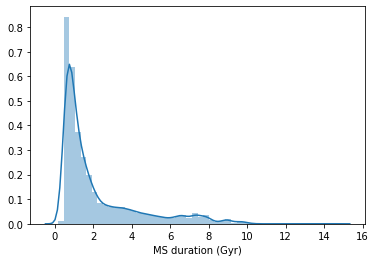

In [14]:
sns.distplot(df_ms['MS_duration']/1e9)
pl.xlabel('MS duration (Gyr)')

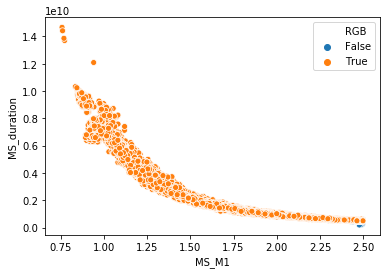

In [15]:
sns.scatterplot('MS_M1', 'MS_duration', data=df_ms, hue='RGB')

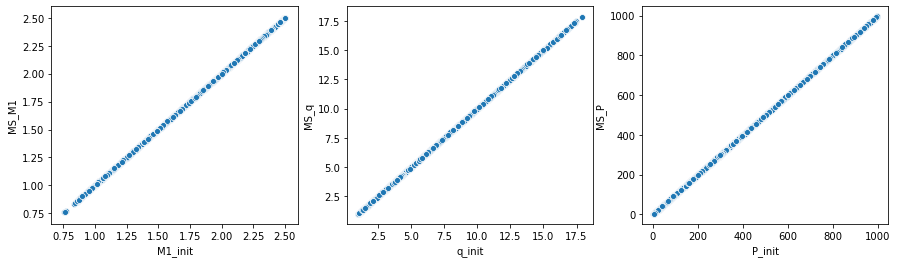

In [16]:
pl.figure(figsize=(15,4))
pl.subplot(131)
sns.scatterplot('M1_init', 'MS_M1', data=df_ms)
pl.subplot(132)
sns.scatterplot('q_init', 'MS_q', data=df_ms)
pl.subplot(133)
sns.scatterplot('P_init', 'MS_P', data=df_ms)

# Red Giant Branch

In [17]:
df_rgb = df[~df['RGB_duration'].isna()]

Text(0.5, 0, 'RGB duration (Myr)')

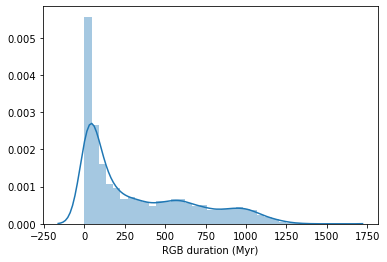

In [18]:
sns.distplot(df_rgb['RGB_duration']/1e6)
pl.xlabel('RGB duration (Myr)')

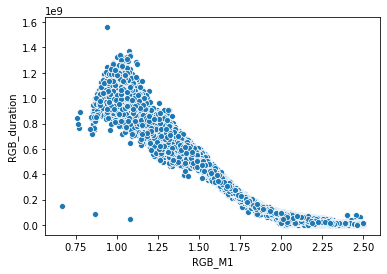

In [19]:
sns.scatterplot('RGB_M1', 'RGB_duration', data=df_rgb)

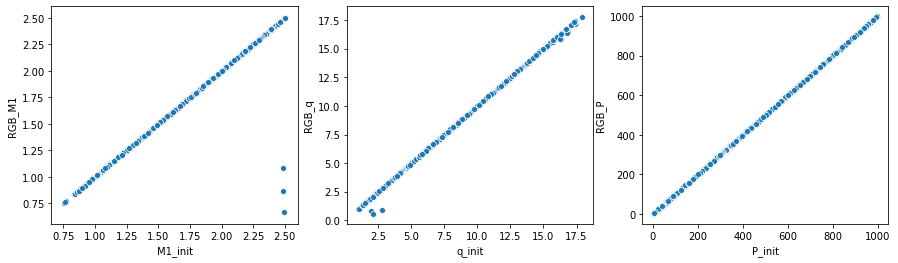

In [20]:
pl.figure(figsize=(15,4))
pl.subplot(131)
sns.scatterplot('M1_init', 'RGB_M1', data=df_rgb)
pl.subplot(132)
sns.scatterplot('q_init', 'RGB_q', data=df_rgb)
pl.subplot(133)
sns.scatterplot('P_init', 'RGB_P', data=df_rgb)

# Mass loss phase

In [21]:
df_ml = df[~df['ML_duration'].isna()]

Text(0.5, 0, 'ML duration (yr)')

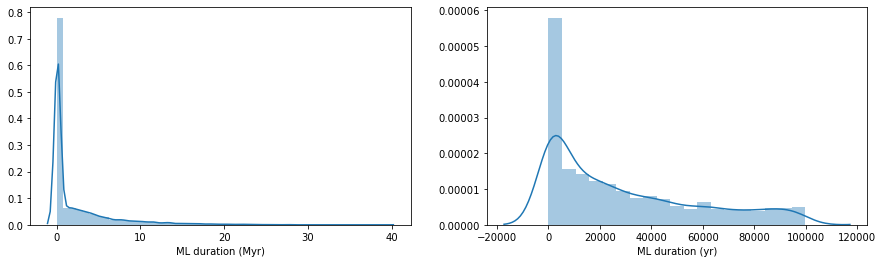

In [30]:
pl.figure(figsize=(15,4))
pl.subplot(121)
sns.distplot(df_ml['ML_duration'][df_ml['ML_duration']<50e6] / 1e6)
pl.xlabel('ML duration (Myr)')
pl.subplot(122)
sns.distplot(df_ml['ML_duration'][df_ml['ML_duration']<1e5])
pl.xlabel('ML duration (yr)')

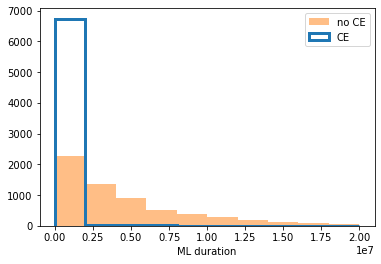

In [33]:
pl.figure()
d = df_ml[df_ml['CE'] == 0]
_, bins, _ = pl.hist(d['ML_duration'][d['ML_duration']<20e6], label='no CE', color='C1', alpha=0.5)
d = df_ml[df_ml['CE'] == 1]
_ = pl.hist(d['ML_duration'][d['ML_duration']<20e6], label='CE', color='C0', histtype='step', bins=bins, lw=3)
pl.xlabel('ML duration')
pl.legend()

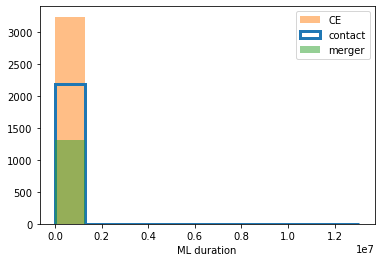

In [34]:
pl.figure()
d = df_ml[df_ml['stability'] == 'CE']
_, bins, _ = pl.hist(d['ML_duration'][d['ML_duration']<20e6], label='CE', color='C1', alpha=0.5)
d = df_ml[df_ml['stability'] == 'contact']
_ = pl.hist(d['ML_duration'][d['ML_duration']<20e6], label='contact', color='C0', histtype='step', bins=bins, lw=3)
d = df_ml[df_ml['stability'] == 'merger']
_ = pl.hist(d['ML_duration'][d['ML_duration']<20e6], label='merger', color='C2', bins=bins, alpha=0.5)
pl.xlabel('ML duration')
pl.legend()

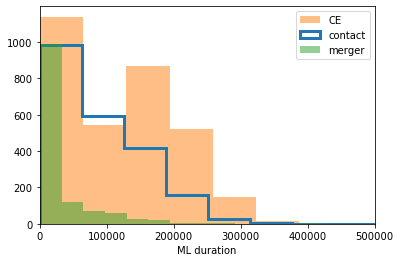

In [43]:
d = df_ml[df_ml['stability'] == 'CE']
_ = visualization.hist(d['ML_duration'][d['ML_duration']<20e6], bins='knuth', label='CE', color='C1', alpha=0.5)
d = df_ml[df_ml['stability'] == 'contact']
_ = visualization.hist(d['ML_duration'][d['ML_duration']<20e6], bins='knuth', label='contact', color='C0', histtype='step', lw=3)
d = df_ml[df_ml['stability'] == 'merger']
_ = visualization.hist(d['ML_duration'][d['ML_duration']<20e6], bins='knuth', label='merger', color='C2', alpha=0.5)
pl.xlabel('ML duration')
pl.xlim([0, 5e5])
pl.legend()

(0, 13)

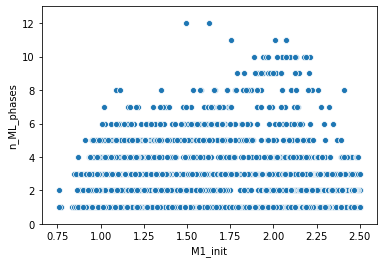

In [25]:
sns.scatterplot('M1_init', 'n_ML_phases', data=df_ml)
pl.ylim([0, 13])